#                                 Telecom Customer Churn Project 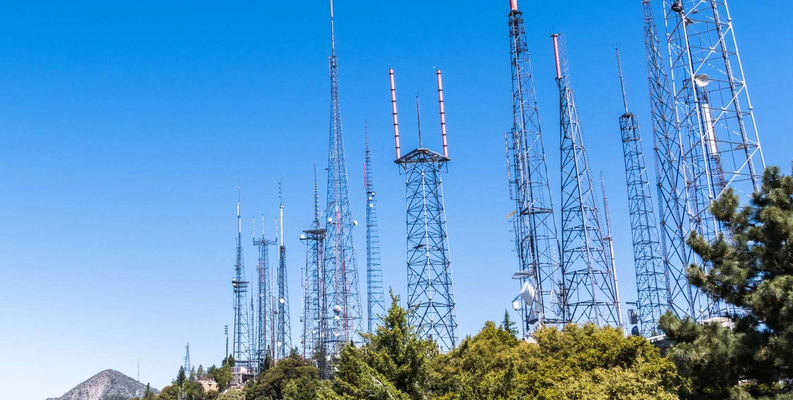

#Import Libraries

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [182]:
df = pd.read_csv('/content/telecom_customer_churn.csv')

# Exploratory Data Analysis (EDA)

In [183]:
# First 5 rows
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [184]:
#last 5 rows
df.tail()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.0,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN
7042,9995-HOTOH,Male,36,Yes,0,Sierra City,96125,39.600599,-120.636358,1,...,Bank Withdrawal,59.00,3707.60,0.0,0,0.00,3707.60,Stayed,NaN,NaN


In [185]:
#num of columns and rows
df.shape

(7043, 38)

In [186]:
# names of columns
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [187]:
# types
df.dtypes

,0
Customer ID,object
Gender,object
Age,int64
Married,object
Number of Dependents,int64
City,object
Zip Code,int64
Latitude,float64
Longitude,float64
Number of Referrals,int64


In [188]:
# nulls and types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [189]:
# statistics of numerical columns
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


# Preprocessing

# Check Duplicates

In [190]:
df.duplicated().sum() # no duplicates

np.int64(0)

#Check NULLS

In [191]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


In [192]:
#most of Churn Category,Churn Reason nulls so i will drop them
df.drop(['Churn Category','Churn Reason'],axis=1, inplace=True)

#Deal with categorical columns


In [193]:
print("Number of customers with no Phone Service:",
      (df['Phone Service'] == 'No').sum())

print("Number of customers with no Internet Service:",
      (df['Internet Service'] == 'No').sum())


Number of customers with no Phone Service: 682
Number of customers with no Internet Service: 1526


In [194]:
null_columns = df.columns[df.isnull().any()]
null_percent = (df[null_columns].isnull().sum() / len(df)) * 100
print(null_percent.round(2))

Offer                                55.05
Avg Monthly Long Distance Charges     9.68
Multiple Lines                        9.68
Internet Type                        21.67
Avg Monthly GB Download              21.67
Online Security                      21.67
Online Backup                        21.67
Device Protection Plan               21.67
Premium Tech Support                 21.67
Streaming TV                         21.67
Streaming Movies                     21.67
Streaming Music                      21.67
Unlimited Data                       21.67
dtype: float64


In [195]:
nulls_in_categorical = df.select_dtypes(include=['object']).isna().sum()
nulls_in_categorical = nulls_in_categorical[nulls_in_categorical > 0]
print(nulls_in_categorical if not nulls_in_categorical.empty else "No nulls")


Offer                     3877
Multiple Lines             682
Internet Type             1526
Online Security           1526
Online Backup             1526
Device Protection Plan    1526
Premium Tech Support      1526
Streaming TV              1526
Streaming Movies          1526
Streaming Music           1526
Unlimited Data            1526
dtype: int64


In [196]:

cols = [
    'Offer',
    'Multiple Lines',
    'Internet Type',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data'
]

print(df[cols].head(15))


      Offer Multiple Lines Internet Type Online Security Online Backup  \
0       NaN             No         Cable              No           Yes   
1       NaN            Yes         Cable              No            No   
2   Offer E             No   Fiber Optic              No            No   
3   Offer D             No   Fiber Optic              No           Yes   
4       NaN             No   Fiber Optic              No            No   
5   Offer E             No         Cable              No            No   
6   Offer A             No   Fiber Optic             Yes           Yes   
7   Offer B            Yes   Fiber Optic             Yes            No   
8   Offer E             No           DSL             Yes            No   
9       NaN            Yes         Cable             Yes           Yes   
10      NaN            NaN         Cable             Yes            No   
11      NaN            Yes   Fiber Optic             Yes           Yes   
12      NaN             No   Fiber Opt

In [197]:
# with internet sevice (no) we have 9 columns were affected
# Internet Type, Online Security, Online Backup, Device Protection Plan, Premium Tech Support
# Streaming TV, Streaming Movies, Streaming Music, Unlimited Data

# with phone service (no) we have multiple lines with nulls

df['Offer'] = df['Offer'].fillna('No Offer')
df['Internet Type'] = df['Internet Type'].fillna('No Internet')
service_cols = [
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
    'Streaming Music', 'Unlimited Data', 'Multiple Lines'
]

for col in service_cols:
    df[col] = df[col].fillna('No')


#Deal with Numerical Columns

In [198]:
#check nulls in numerical columns
nulls_in_numerical = df.select_dtypes(include=['int64', 'float64']).isna().sum()
nulls_in_numerical = nulls_in_numerical[nulls_in_numerical > 0]
print(nulls_in_numerical if not nulls_in_numerical.empty else "No nulls")


Avg Monthly Long Distance Charges     682
Avg Monthly GB Download              1526
dtype: int64


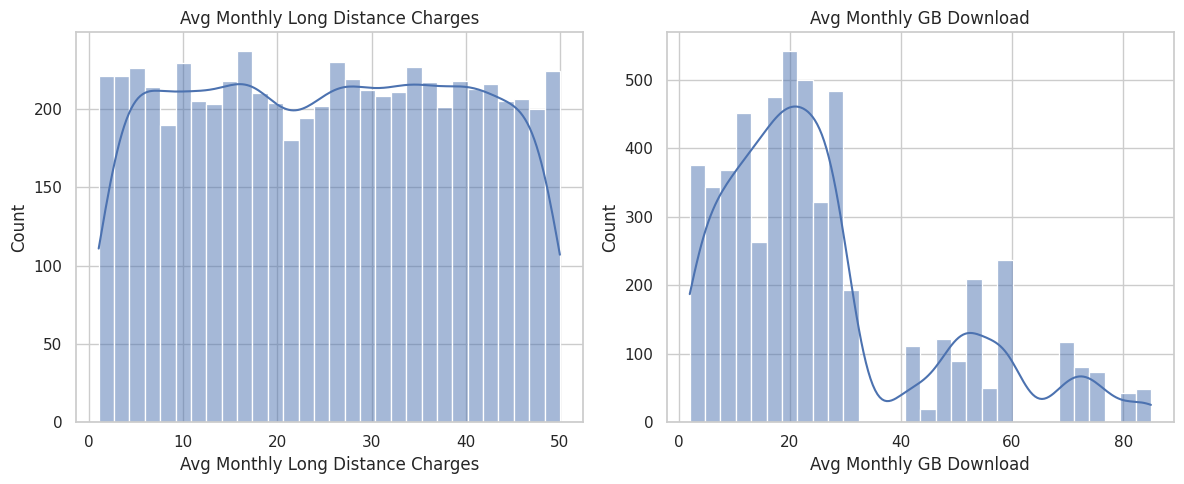

In [199]:
# histogram of them
#plot for Avg Monthly Long Distance Charges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Avg Monthly Long Distance Charges'], kde=True, bins=30)
plt.title('Avg Monthly Long Distance Charges')

#plot for Avg Monthly GB Download
plt.subplot(1, 2, 2)
sns.histplot(df['Avg Monthly GB Download'], kde=True, bins=30)
plt.title('Avg Monthly GB Download')

plt.tight_layout()
plt.show()


In [200]:
# #fill nulls with mean (normal)
# df['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].mean(), inplace=True)
df['Avg Monthly Long Distance Charges'] = (df['Total Long Distance Charges'] / df['Tenure in Months'])
df.loc[df['Phone Service'] == 'No', 'Avg Monthly Long Distance Charges'] = 0


In [201]:
df.fillna({'Avg Monthly GB Download': 0}, inplace=True)
 # same numbers nulls as no internet service columns

In [202]:
# check nulls again
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


#Visualization with Customer Status Column

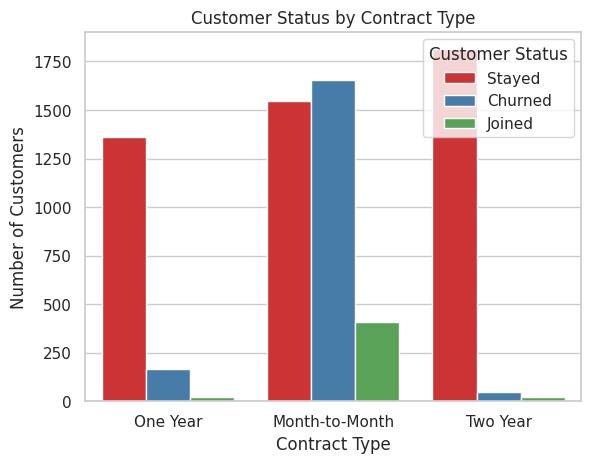

In [203]:
# count plot showing the distribution of Customer Status for each Contract type
sns.countplot(data=df, x='Contract', hue='Customer Status', palette='Set1')
plt.title('Customer Status by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

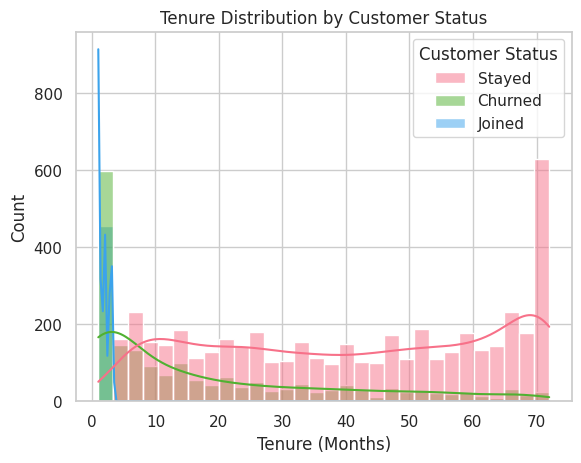

In [204]:
sns.histplot(data=df, x='Tenure in Months', hue='Customer Status', kde=True, palette='husl', bins=30)
plt.title('Tenure Distribution by Customer Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-940856693.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-940856693.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-940856693.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-940856693.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-940856693.py:22: UserWarning: set_ticklabels() should only be

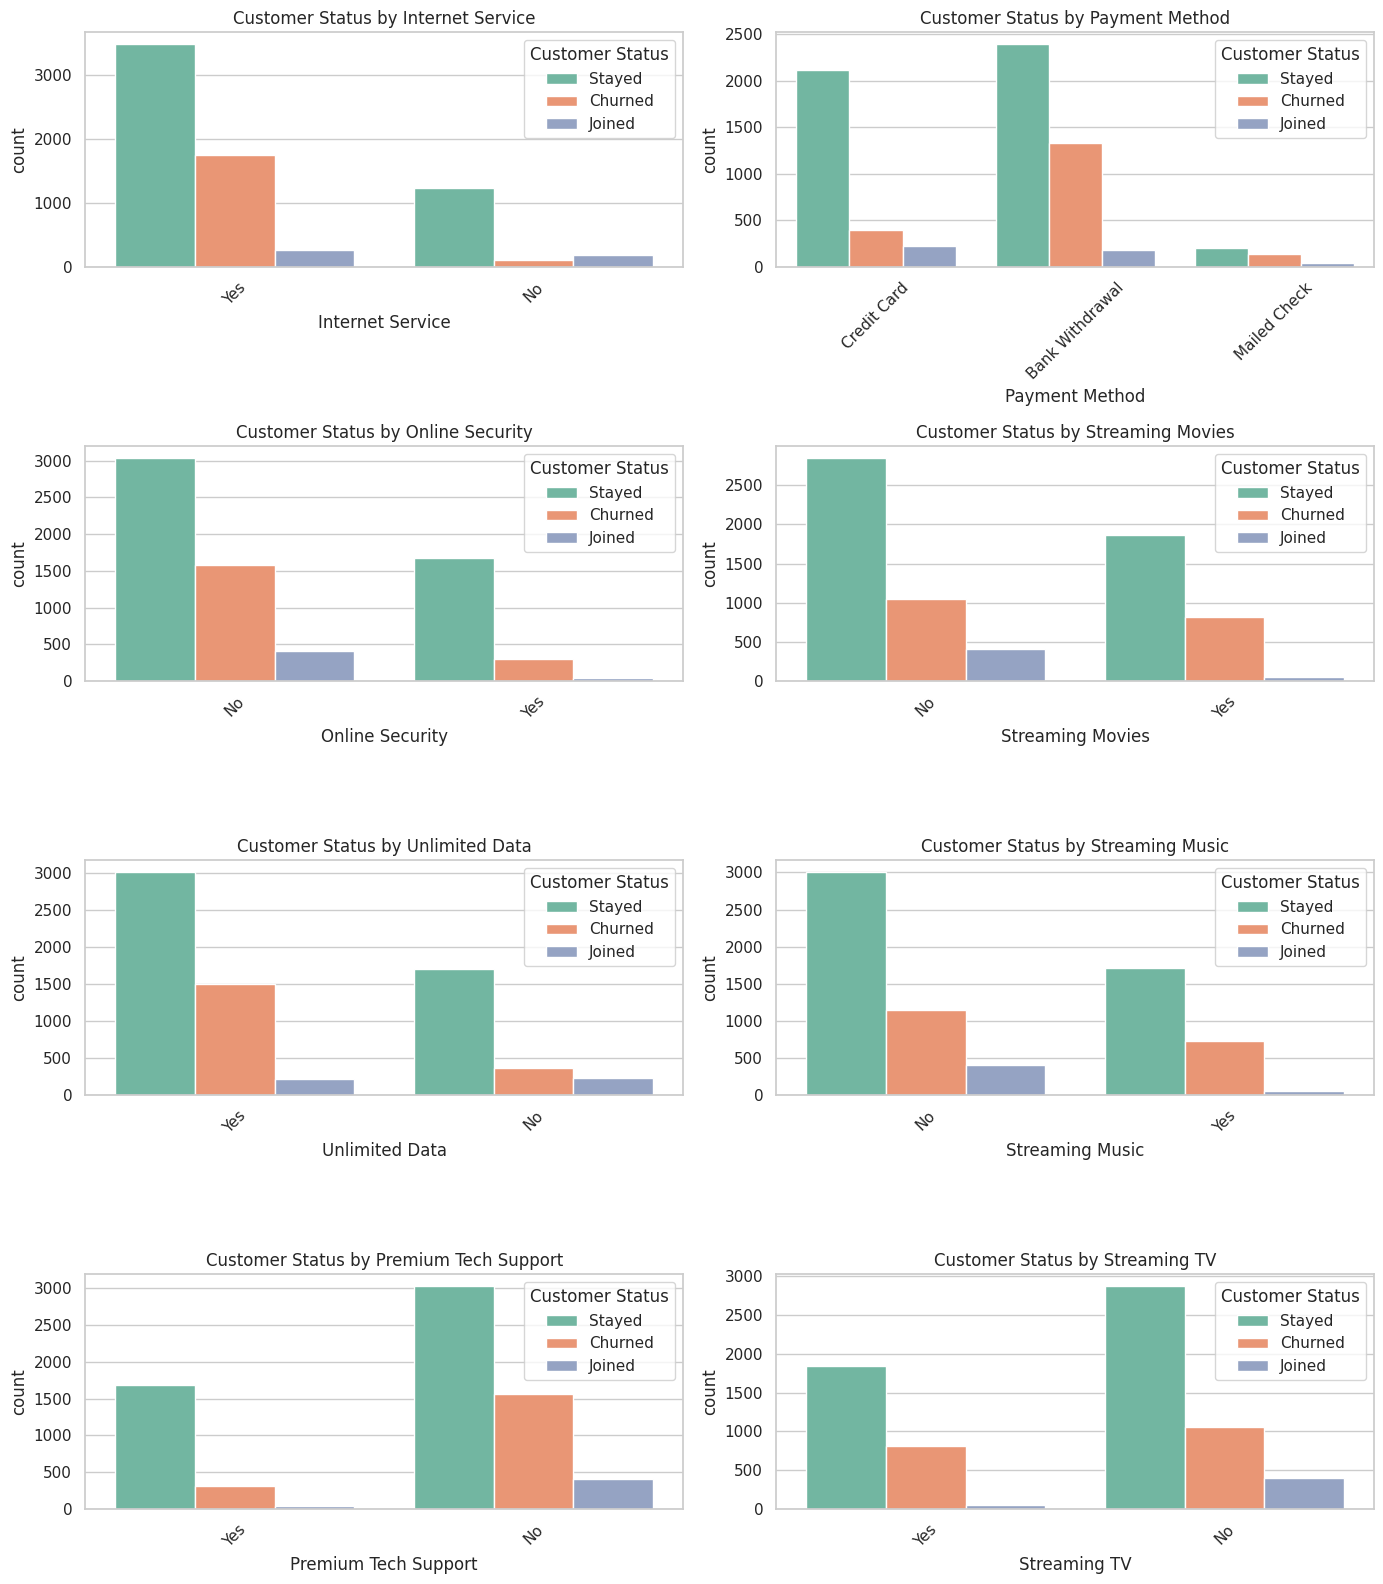

In [205]:
sns.set(style="whitegrid")
target = 'Customer Status'

categorical_features = [
    'Internet Service',
    'Payment Method',
    'Online Security',
    'Streaming Movies',
    'Unlimited Data',
    'Streaming Music',
    'Premium Tech Support',
    'Streaming TV'
]
rows = 4
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 16))

axes = axes.flatten()
for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, hue=target, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{target} by {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
for j in range(len(categorical_features), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Check unbalance

In [206]:
# 1 - Value counts
df['Customer Status'].value_counts() #Unbalance

,count
Customer Status,
Stayed,4720
Churned,1869
Joined,454


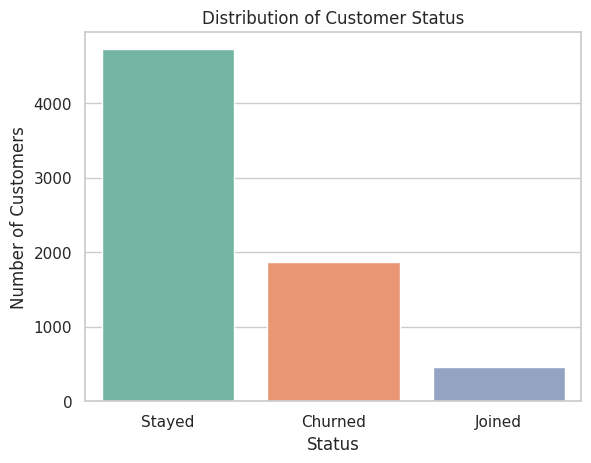

In [207]:
# 2 - Count plot
sns.countplot(data=df, x='Customer Status', hue='Customer Status', palette='Set2', legend=False)
plt.title('Distribution of Customer Status')
plt.xlabel('Status')
plt.ylabel('Number of Customers')
plt.show()


#Check Outliers

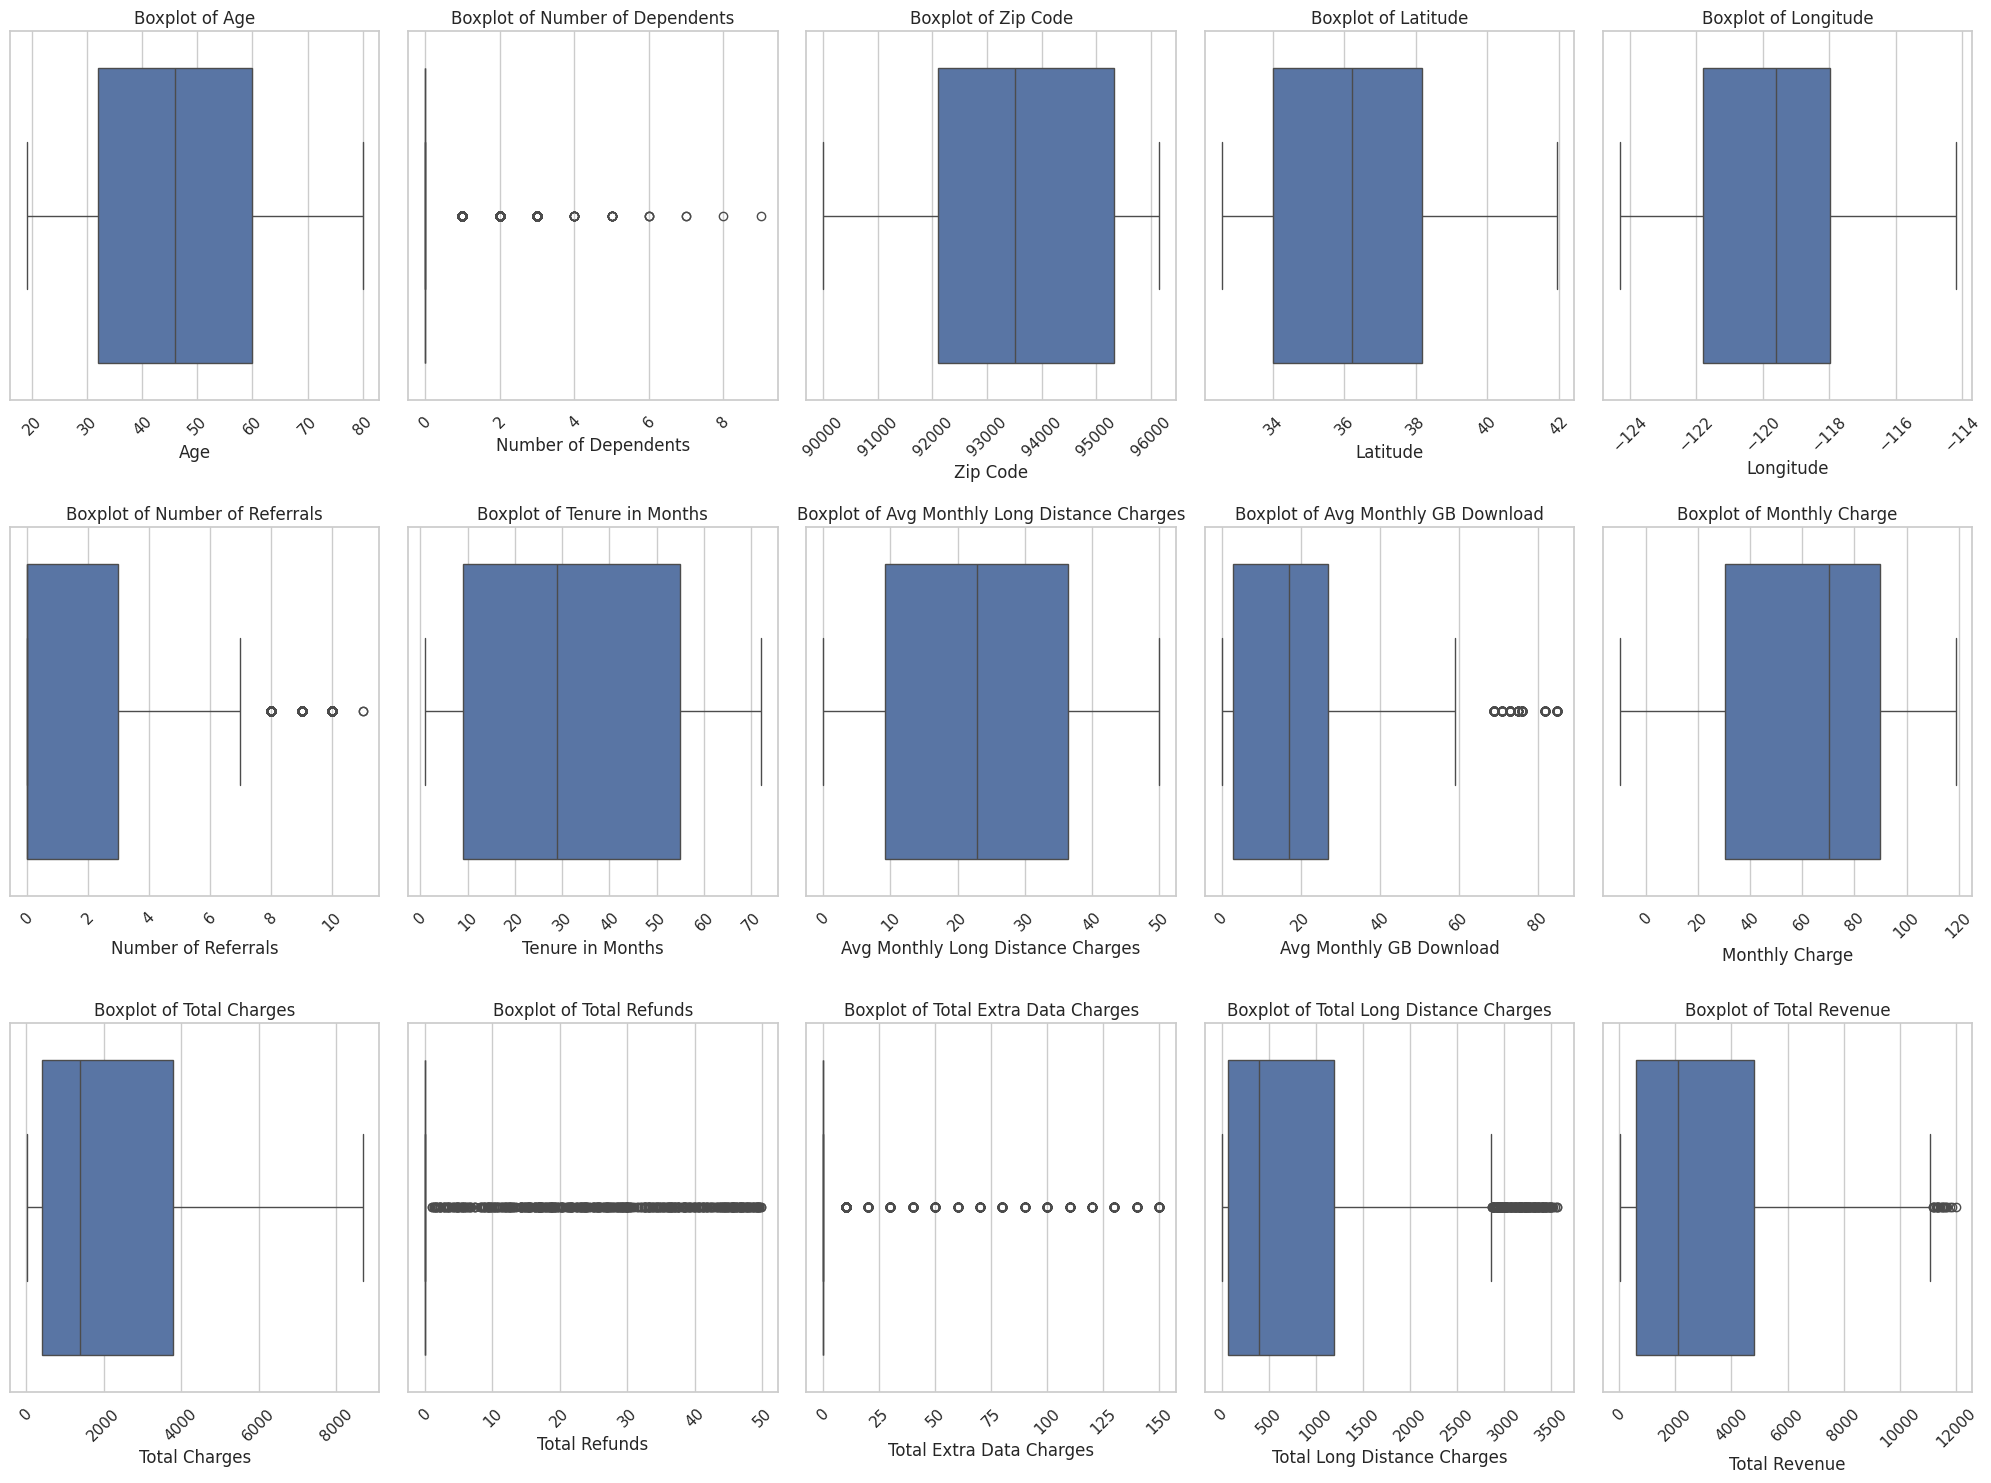

In [208]:
#Check outliers with boxplots
numeric_data = df.select_dtypes(include=['number'])
numeric_cols = numeric_data.columns

n_cols = 5
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=numeric_data, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [209]:
#check outliers with IQR and impute with lower & Upper
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
def handle_all_outliers(df, columns):
    for column in columns:
        # Q1, Q3 and IQR
        q1 = np.percentile(df[column], 25)
        q3 = np.percentile(df[column], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # clip values to remove outliers
        df[column] = np.clip(df[column], lower_bound, upper_bound)

    return df
df = handle_all_outliers(df, numeric_columns)

# calculate outliers for all numeric columns
outlier_counts = []
for col in df.select_dtypes(include='number'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_counts.append((col, n_outliers, len(df), f"{n_outliers/len(df):.1%}"))

# display table
outlier_table = pd.DataFrame(outlier_counts,
                           columns=['Column', 'Outliers', 'Total', '% Outliers'])
outlier_table.sort_values('Outliers', ascending=False)

,Column,Outliers,Total,% Outliers
0,Age,0,7043,0.0%
1,Number of Dependents,0,7043,0.0%
2,Zip Code,0,7043,0.0%
3,Latitude,0,7043,0.0%
4,Longitude,0,7043,0.0%
5,Number of Referrals,0,7043,0.0%
6,Tenure in Months,0,7043,0.0%
7,Avg Monthly Long Distance Charges,0,7043,0.0%
8,Avg Monthly GB Download,0,7043,0.0%
9,Monthly Charge,0,7043,0.0%


#Encoding


In [210]:
df.select_dtypes(include=['object']).dtypes

,0
Customer ID,object
Gender,object
Married,object
City,object
Offer,object
Phone Service,object
Multiple Lines,object
Internet Service,object
Internet Type,object
Online Security,object


In [211]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [212]:
df.sample()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
5198,5198,1,29,0,0,891,90405,34.005439,-118.477507,0.0,...,0,0,0,100.75,1313.25,0.0,0,577.59,2010.84,2


In [213]:
df['Customer Status'].value_counts()

,count
Customer Status,
2,4720
0,1869
1,454


#HeatMap

<Axes: >

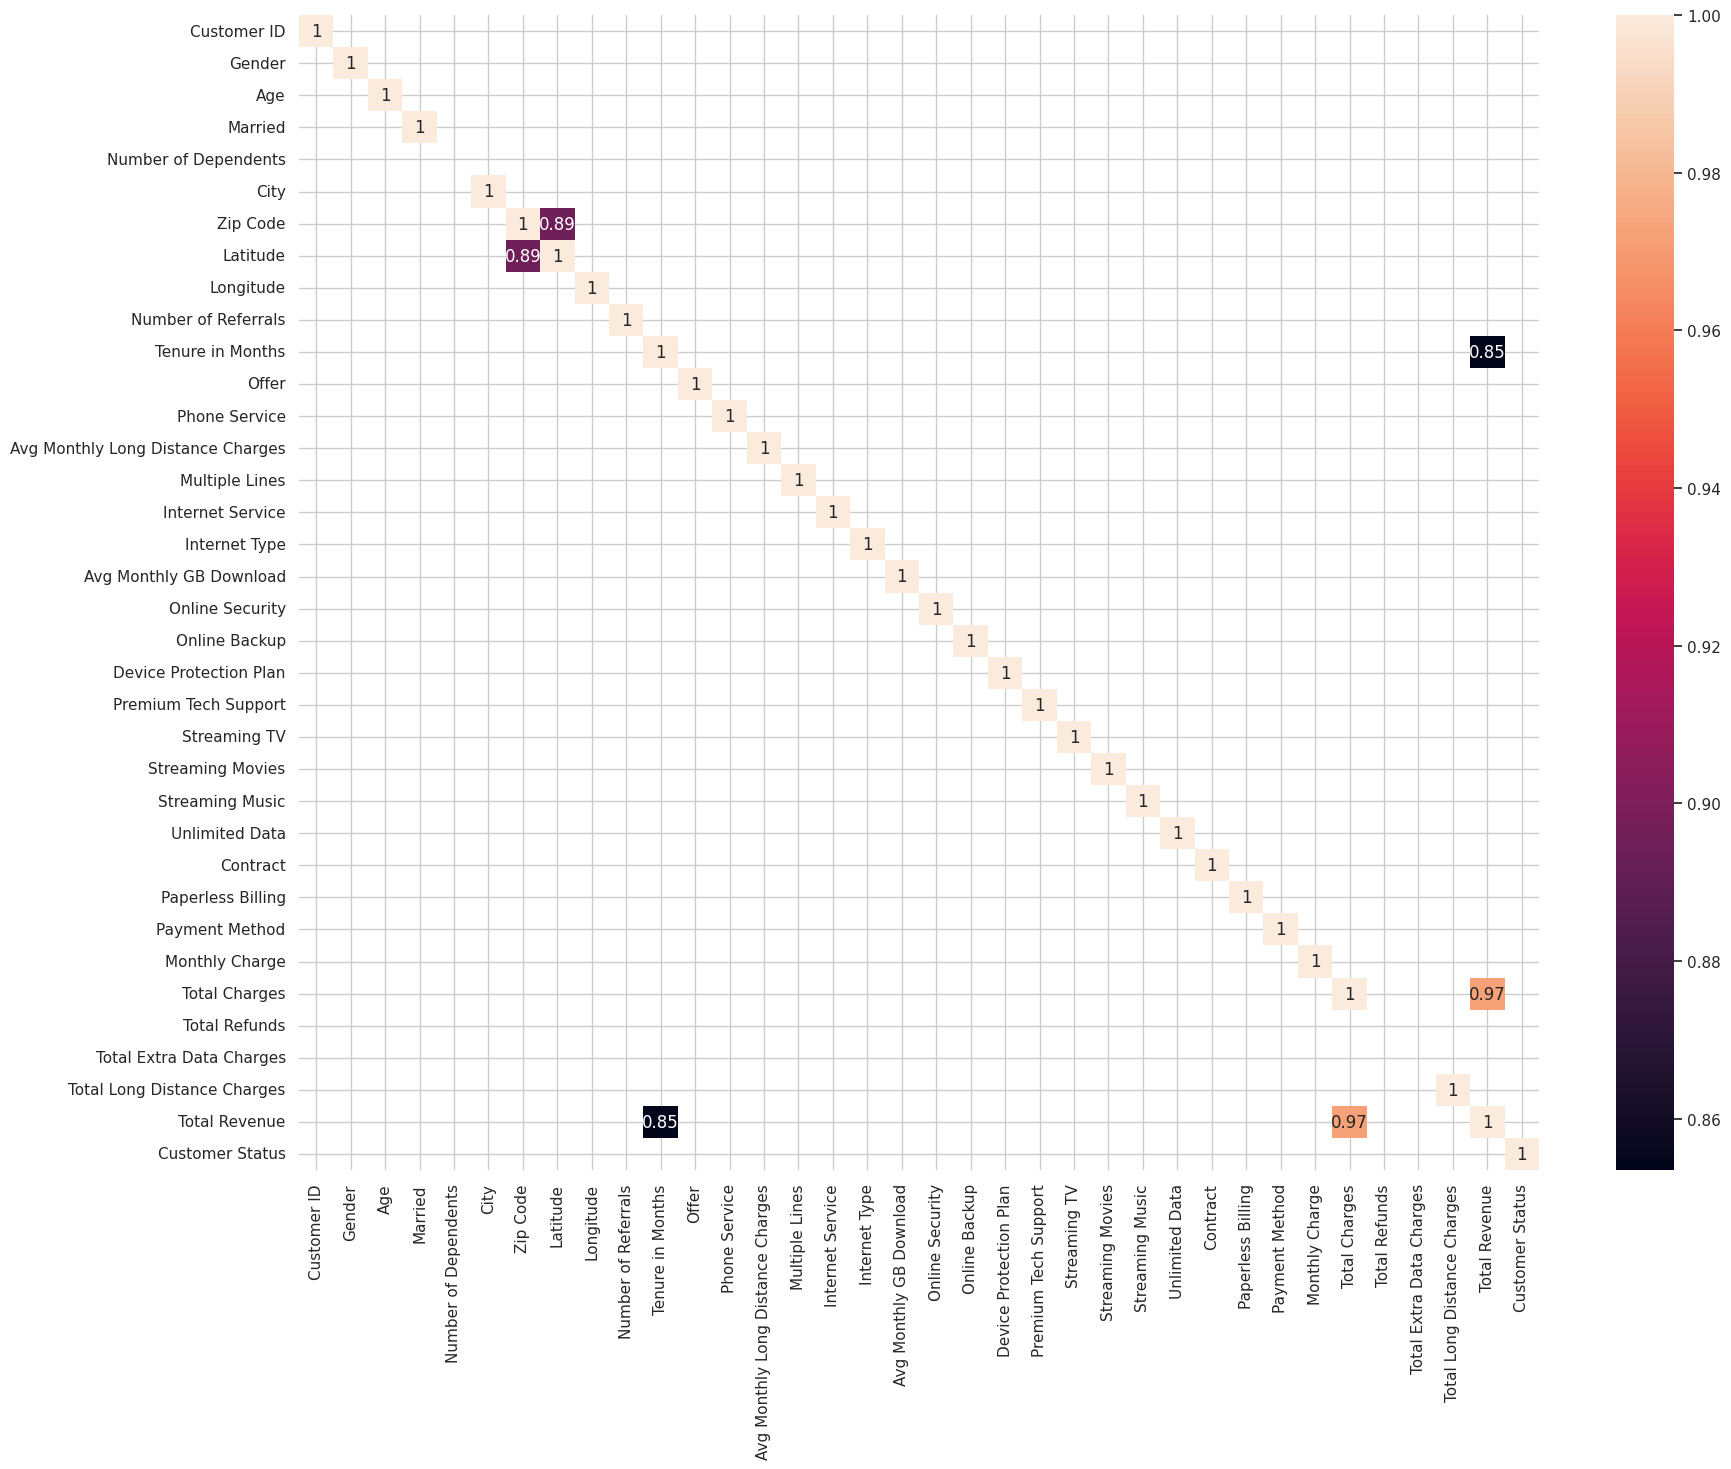

In [214]:
correlation = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation, annot=True , mask=correlation <.85)

In [215]:
df.drop(['Customer ID','City','Latitude','Longitude','Tenure in Months','Total Charges'],axis=1, inplace=True)

#Define X , Y

In [216]:
x=df.drop('Customer Status',axis=1)
y=df['Customer Status']

# Train Test Split

In [217]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
X_train , x_val , y_train , y_val = train_test_split(X_train, y_train, test_size=0.1 , random_state=42, stratify=y_train)

#Scaling

In [218]:
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [219]:
print("x_train Shape: ", X_train.shape)
print("x_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

x_train Shape:  (5070, 29)
x_test Shape:  (1409, 29)
y_train Shape:  (5070,)
y_test Shape:  (1409,)


In [220]:
# feature_names = x.columns
# chi2_selector = SelectKBest(score_func=chi2, k=20)
# x_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
# x_test_chi2 = chi2_selector.transform(X_test)
# selected_columns = feature_names[chi2_selector.get_support()]
# print("Selected columns:", selected_columns.tolist())

#Imbalance

#Smote

In [221]:
from imblearn.over_sampling import SMOTE

from collections import Counter
smote_tomek = SMOTE(random_state=42)
x_smote, y_smote = smote_tomek.fit_resample(x, y)
print(Counter(y_smote))

Counter({2: 4720, 0: 4720, 1: 4720})


#ROS & RUS

In [222]:
# from imblearn.over_sampling import RandomOverSampler ,SMOTE
# from imblearn.under_sampling import RandomUnderSampler, TomekLinks
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter

# # Step 1:oversample
# ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
# x_over, y_over = ros.fit_resample(x, y)
# print("After oversampling:", Counter(y_over))

# # Step 2:undersample
# rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# x_res, y_res = rus.fit_resample(x_over, y_over)
# print("After over+under sampling:", Counter(y_res))
############### F1 of classes is worse ##########

In [223]:
# x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
# x_smote_train, x_smote_val, y_smote_train, y_smote_val = train_test_split(x_smote_train, y_smote_train, test_size=0.1, random_state=42)

# ExtraTreesClassifier Model

In [224]:
bagging_model = BaggingClassifier(
    estimator=ExtraTreesClassifier(
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=1
    ),
    n_estimators=100,
    max_samples=0.75,
    max_features=0.7,
    bootstrap=True,
    oob_score=True,
    n_jobs=1,
    random_state=42
)




In [225]:
bagging_model.fit(x_smote, y_smote)
y_train_pred = bagging_model.predict(x_smote)
y_val_pred = bagging_model.predict(x_val)
y_test_pred = bagging_model.predict(X_test)

In [226]:
print("Train Accuracy:", accuracy_score(y_smote, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.8379237288135594
Test Accuracy: 0.8168914123491838


Confusion Matrix (Test):
 [[294  31  49]
 [ 27  56   8]
 [111  32 801]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.68      0.79      0.73       374
           1       0.47      0.62      0.53        91
           2       0.93      0.85      0.89       944

    accuracy                           0.82      1409
   macro avg       0.69      0.75      0.72      1409
weighted avg       0.84      0.82      0.82      1409



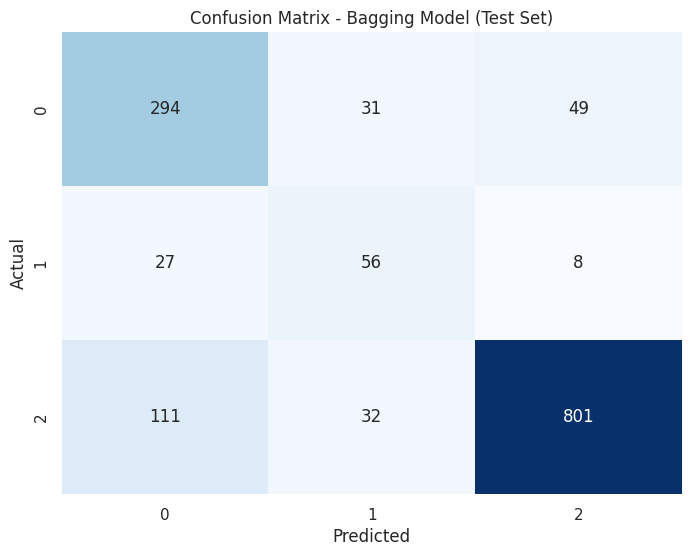

In [227]:
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Bagging Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Decision Tree Model

In [228]:
dt_model = DecisionTreeClassifier(
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

dt_model.fit(x_smote, y_smote)


DecisionTreeClassifier(max_depth=12, min_samples_leaf=2, random_state=42)

In [229]:
y_train_pred = dt_model.predict(x_smote)
y_test_pred = dt_model.predict(X_test)
print("Train Accuracy:", accuracy_score(y_smote, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.9232344632768361
Test Accuracy : 0.8999290276792051



Confusion Matrix (Test):
 [[335  10  29]
 [  8  83   0]
 [ 86   8 850]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       374
           1       0.82      0.91      0.86        91
           2       0.97      0.90      0.93       944

    accuracy                           0.90      1409
   macro avg       0.86      0.90      0.88      1409
weighted avg       0.91      0.90      0.90      1409



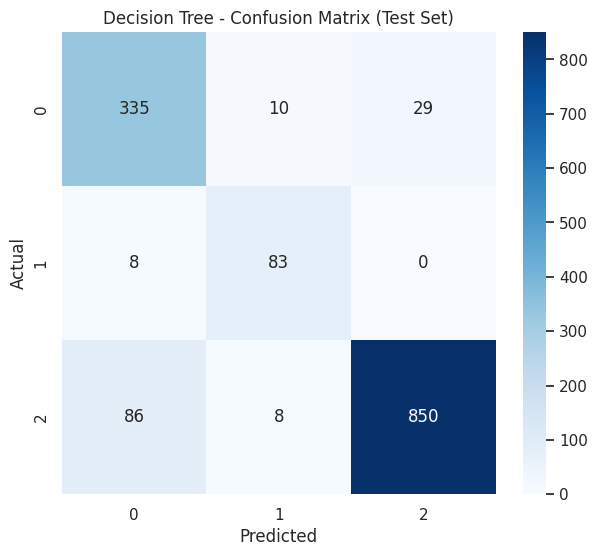

In [230]:
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test):\n", cm_test)
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

classes = sorted(list(set(y_test)))
plt.figure(figsize=(7, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix (Test Set)')
plt.show()

#RandomForest Model

In [231]:
rf = RandomForestClassifier(
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=1,
    n_estimators=50,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

bagging_model = BaggingClassifier(
    estimator=rf,
    n_estimators=50,
    max_samples=0.85,
    max_features=0.8,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=42
)

bagging_model.fit(x_smote, y_smote)

BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                   max_depth=15,
                                                   min_samples_split=4,
                                                   n_estimators=50, n_jobs=-1,
                                                   random_state=42),
                  max_features=0.8, max_samples=0.85, n_estimators=50,
                  n_jobs=-1, oob_score=True, random_state=42)

In [232]:
y_train_pred = bagging_model.predict(x_smote)
y_test_pred = bagging_model.predict(X_test)

In [233]:
print("Train Accuracy:", accuracy_score(y_smote, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.9394067796610169
Test Accuracy : 0.9311568488289567



Confusion Matrix:
 [[329  12  33]
 [  2  89   0]
 [ 46   4 894]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       374
           1       0.85      0.98      0.91        91
           2       0.96      0.95      0.96       944

    accuracy                           0.93      1409
   macro avg       0.89      0.93      0.91      1409
weighted avg       0.93      0.93      0.93      1409



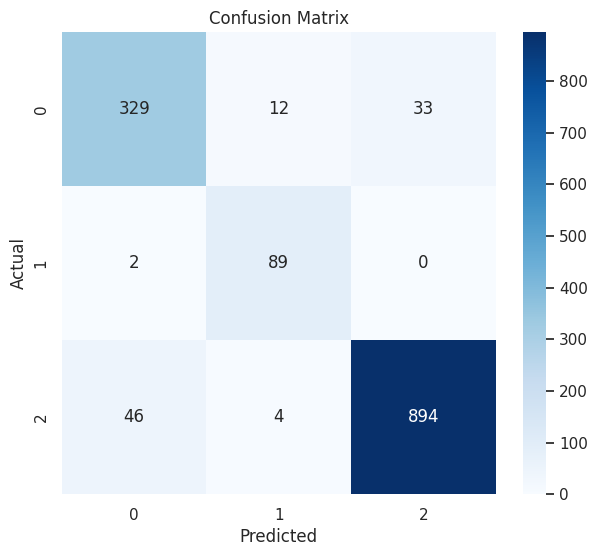

In [234]:
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

classes = sorted(list(set(y_test)))
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Catboost Model

In [235]:
!pip install catboost

In [236]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(
    verbose=0,
    loss_function='MultiClass',
    random_state=42
)

param_grid = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

grid_search_cat = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
grid_search_cat.fit(x_smote, y_smote)

best_cat = grid_search_cat.best_estimator_
print("Best parameters:", grid_search_cat.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


In [237]:
y_train_pred = best_cat.predict(x_smote)
y_test_pred = best_cat.predict(X_test)

In [238]:
train_acc = accuracy_score(y_smote, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.9482
Test Accuracy: 0.9347



Confusion Matrix:
 [[336   7  31]
 [  3  88   0]
 [ 48   3 893]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       374
           1       0.90      0.97      0.93        91
           2       0.97      0.95      0.96       944

    accuracy                           0.93      1409
   macro avg       0.91      0.94      0.92      1409
weighted avg       0.94      0.93      0.94      1409



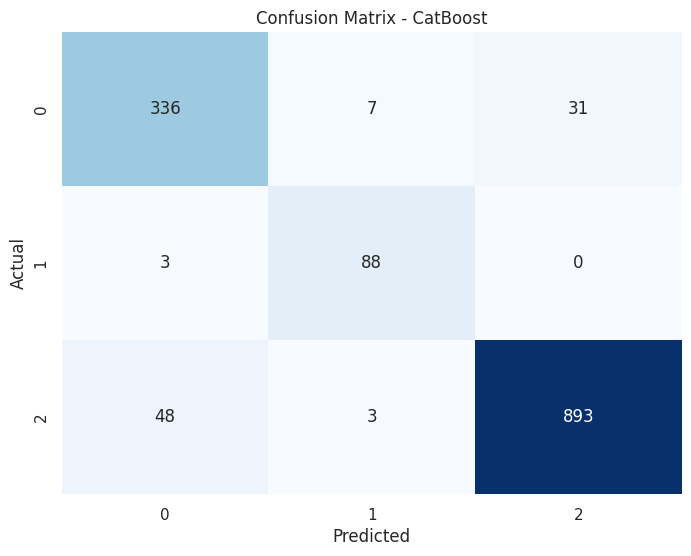

In [239]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#GradientBoosting Model

In [240]:
param_distributions = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.03, 0.05],
    'max_depth': [3, 4],
    'subsample': [0.7, 0.8],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['sqrt', 0.8]
}
gbm = GradientBoostingClassifier(
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=5,
    tol=1e-4
)
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
random_search_gbm = RandomizedSearchCV(
    estimator=gbm,
    param_distributions=param_distributions,
    n_iter=10,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search_gbm.fit(x_smote, y_smote)
print(f"Best parameters: {random_search_gbm.best_params_}")

best_gbm = random_search_gbm.best_estimator_

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.8, 'max_depth': 4, 'learning_rate': 0.05}


In [241]:
y_train_pred = best_gbm.predict(x_smote)
y_test_pred = best_gbm.predict(X_test)
print("Train Accuracy:", accuracy_score(y_smote, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.9407485875706215
Test Accuracy : 0.914833215046132



Confusion Matrix (Test):
 [[314  12  48]
 [  2  89   0]
 [ 55   3 886]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       374
           1       0.86      0.98      0.91        91
           2       0.95      0.94      0.94       944

    accuracy                           0.91      1409
   macro avg       0.88      0.92      0.90      1409
weighted avg       0.92      0.91      0.91      1409



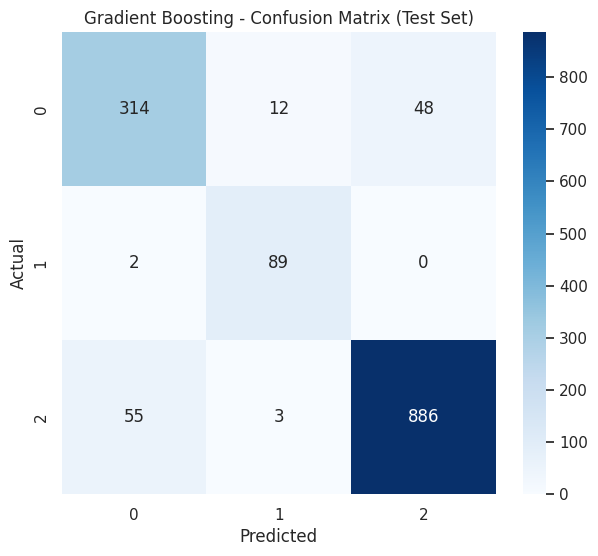

In [242]:
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test):\n", cm_test)
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))
classes = sorted(list(set(y_test)))
plt.figure(figsize=(7, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting - Confusion Matrix (Test Set)')
plt.show()
